<a href="https://colab.research.google.com/github/vcu-swim-lab/digital-forensics-data-science-tutorials/blob/main/Image_Analysis_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Analysis Book**

# Course Goals

* Understand the importance of data science techniques and tools

* Be able to upload large images on google collab

* Utilize various image processing libraries like cv2, PIL

* Understand and apply image processing algorithms to manipulate images

* Detect images of any digital forgery canny algorithm you can easily see the edges and detect from each image

# Chapter 1: Loading in the Libraries and Intro to Collab

> This section goes over some of the required libraries utilized within this notebook but not limited to: **numpy**, **cv2**,  **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.

*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks and helps with our many image processing techniques.

*   [PIL](https://pillow.readthedocs.io/en/stable/handbook/overview.html) library for adding more image processing capabilities of an image

*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.




In [8]:
#importing our libraries and modules for image processing 
from google.colab import files # Helps with being able to upload our images to the file directory
from IPython.display import Image # Useful for resizing and reformatting our images in the processing step

In [9]:
# Code Block to upload a image
uploaded = files.upload()




Saving footprint-tracking-cybersecurity-digital-footprint.jpg to footprint-tracking-cybersecurity-digital-footprint.jpg


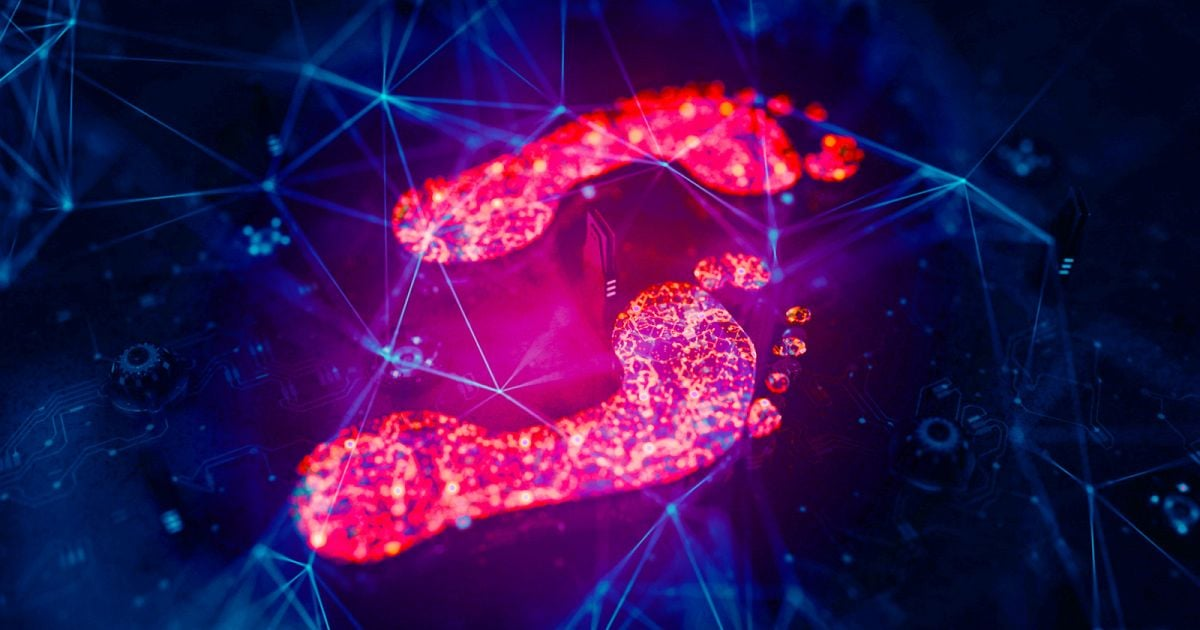

In [10]:
Image('footprint-tracking-cybersecurity-digital-footprint.jpg' , height = 700 , width = 2000)

## Introduction to Digital Forensics

Digital Forensics is a very important branch in forensic science its everywhere in your favorite crime scene shows with that one character working in the lab that is trying to analyze from  thousand tracks of fingerprints, footprints, thumbprints in a case.

The lab analyst could have multiple images piling on in a case there could be hundreds or thousands of images to pull through and sort so we can use the secrets of data science to process our images.

We are going to try to and show you through a set of outsole footwear images ersity on how to tackle this challenge with the process of correlation to find what footprint would belong to the same person in a fast timely manner and many other things. We will also go in depth with many image processing techniques to process a image multiple ways distorting, reducing clutter that will be able cater to the human eye. 


The image set of outsole footwear images from Iowa State University: 
https://iastate.figshare.com/articles/figure/2D_Footwear_outsole_impressions/11624073/1?file=22096299

# Chapter 2: Pre-processing Images and Image Detection Techniques

Gathering images is a important task in data forensics and what we can gain from these images is up to us to interpret any patterns, identifying any correlation and gives us a snap shot view of a case. In this scenario we have identified a footprint which pops up a bunch of questions like what can we use to analyze to the identiy of the indvidual to start off we can ask what is this individual's shoe size, is there any id we can observe, any way we can tell the gender of the individual and if there are any other pictures is there any correlation. Digital forensic investigators must be wary about this as it can solve many future cases there with patterns as identifying if the same footprint belongs to someone and how we can use this in a crime scence case of a series of murders.https://ksltv.com/416930/digital-footprint-led-police-to-suspect-in-lueck-murder/

In this case this image footprint is a women who wears asics S465N with a size of 7.5.

In [11]:
uploaded = files.upload()


Saving 001_01_L_01.jpg to 001_01_L_01.jpg


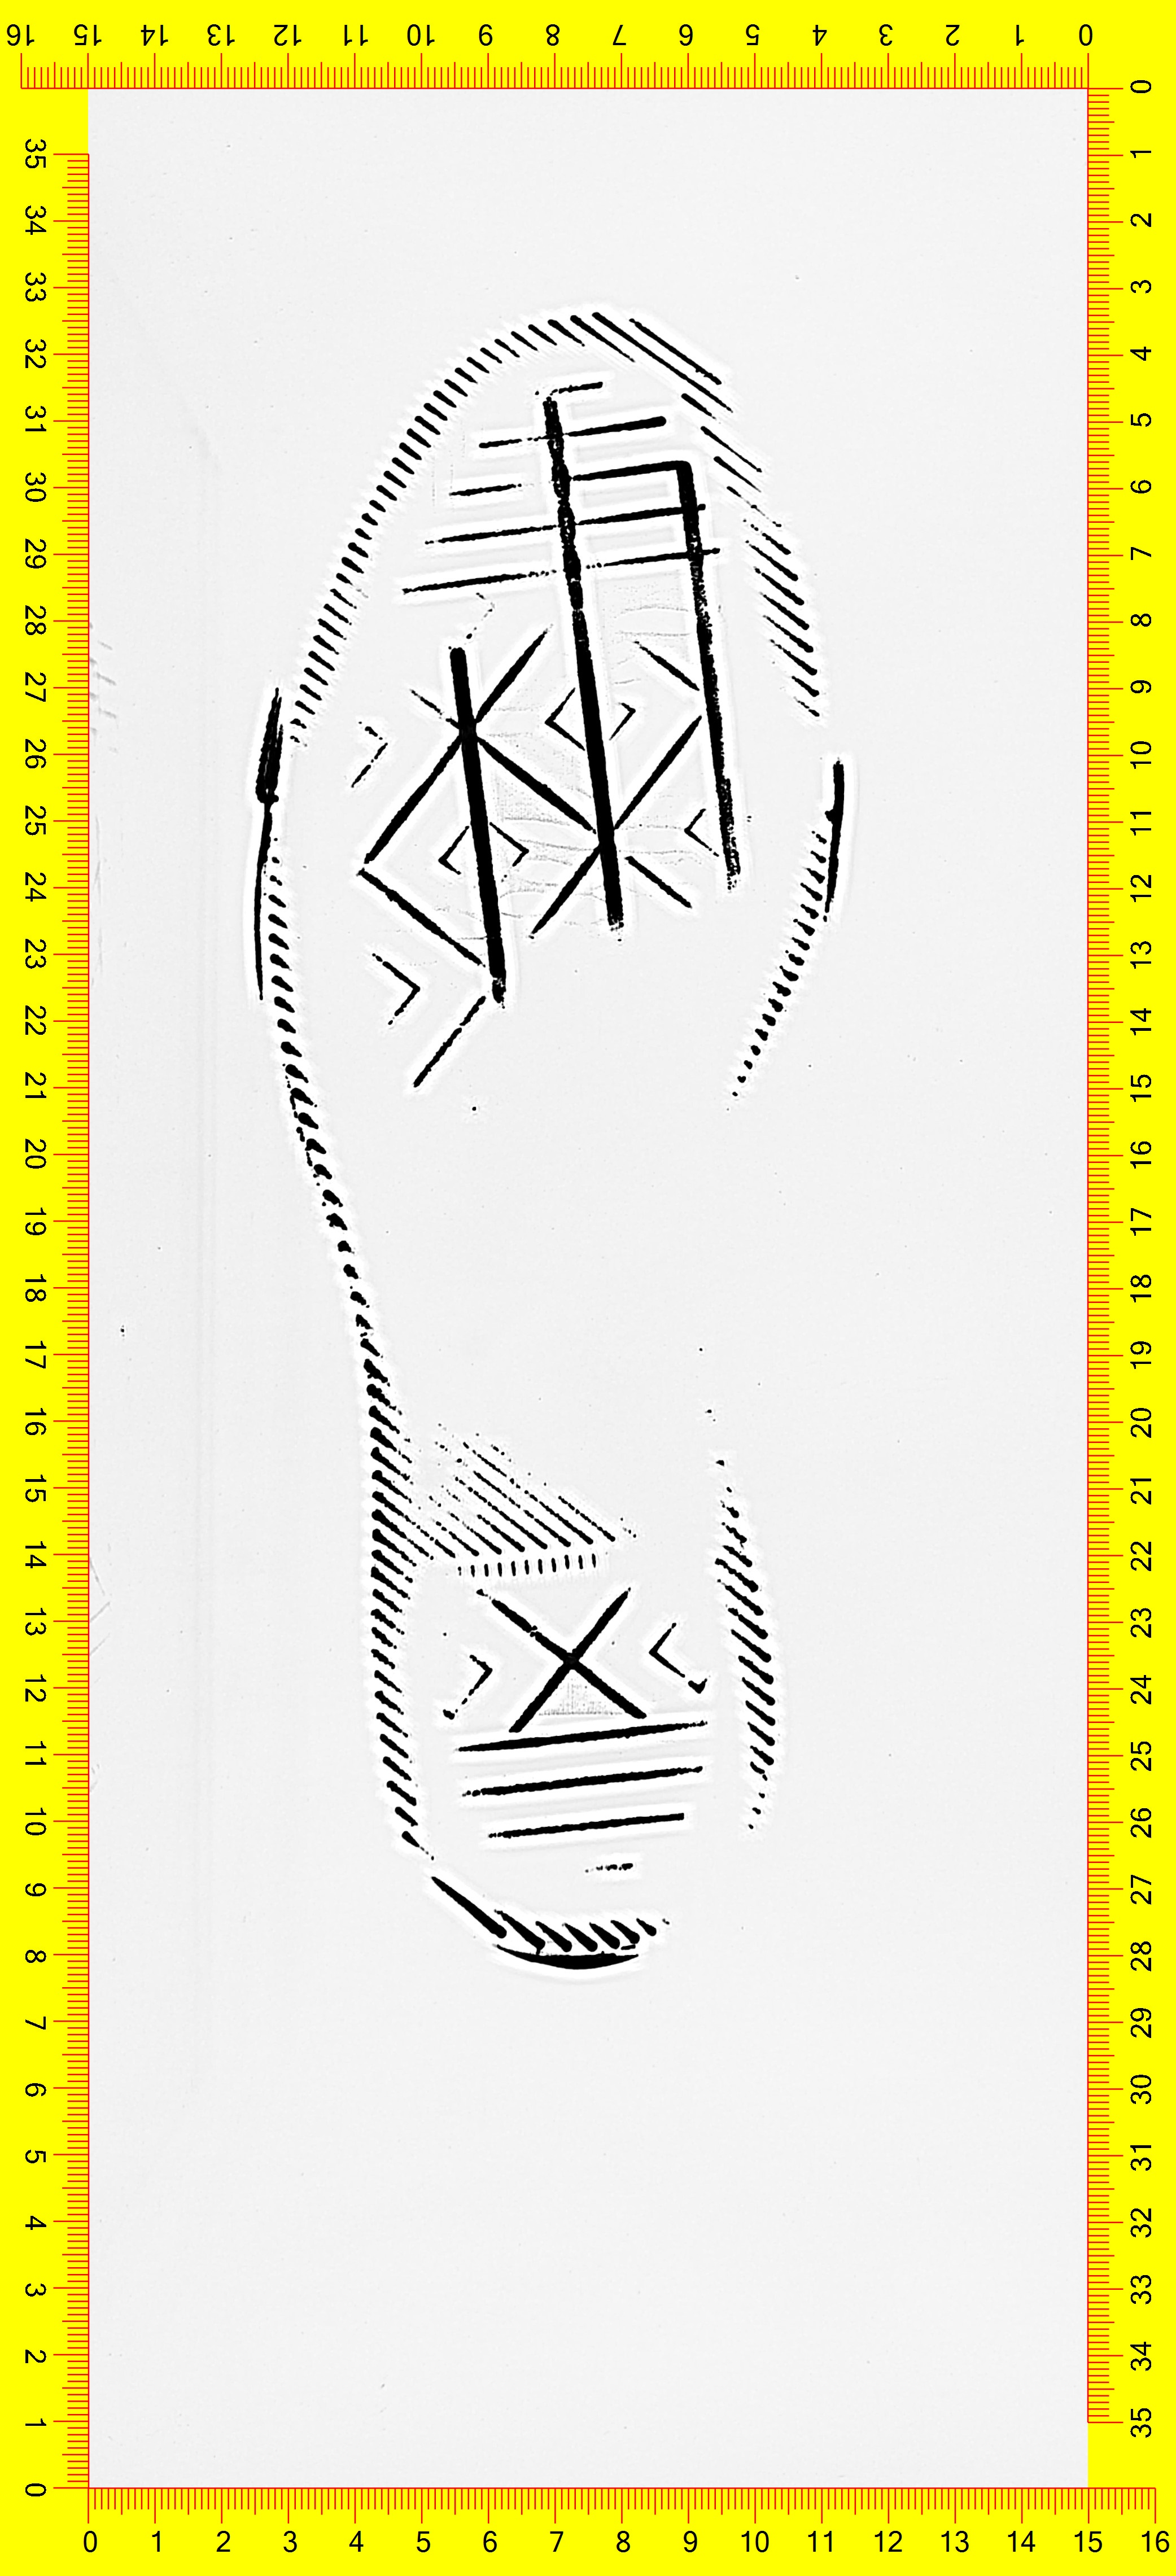

In [13]:
Image('001_01_L_01.jpg' , width = 500 , height = 400 )

## Adding Multiple images at the same time into google collab by having subplots

Saving 001_01_L_01.jpg to 001_01_L_01 (2).jpg


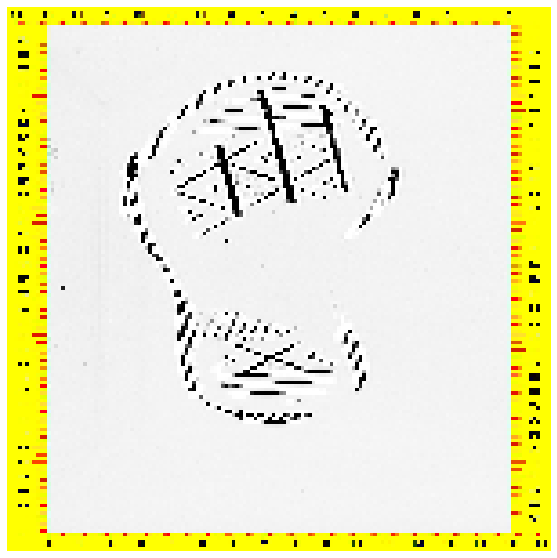

## Canny Algorithm Denoising and Manipulating images by edge detection

The canny algorithm a famous algorithm by John F Canny from 1986 meant to sketch the edges of a object present in a picture. 

> The Canny algorithm is a multi process algorithm and the steps below are essential to sucessfully process the image with the canny algorithm denoted by the picture below and code snippet.
1. Noise reduction
2. Gradient calculation
3. Non-maximum suppression
4. Double threshold
5. Edge Tracking by Hysteresis

>Looking at our code snippet we import our libraries specifically cv2 which has the canny algorithm built in that we can iterate through the image based on its number of features. We first need to read and resize our image with by our matplot lib library.
The canny function has 3 arguments which our first argument is our resized image to fit the scale in matplotlib, 2nd argument is our minVal of our features to our maxVal in arguments

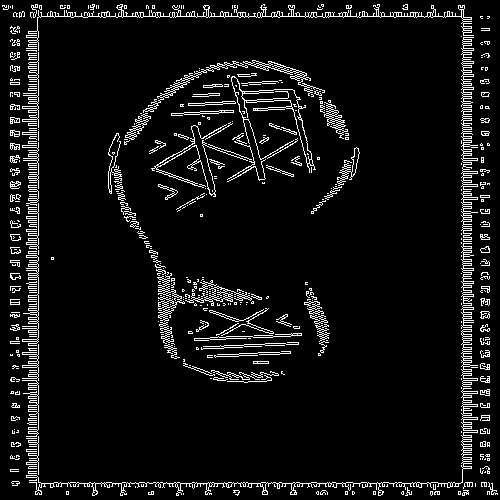

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import PIL



image = cv2.imread("001_01_L_01.jpg", 1)

# resize our images for a dimension

image_resized = cv2.resize(image,(500,500))



# Make our image recognizable by a feature like the discernable edges of the footwear image

edges = cv2.Canny(image_resized,300,400)

cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

TODO Now that you have seen the code try adding your own set of edges and play around

In [ ]:
#TODO Add a new set of edges descriptors using a resized image to fit into google collab changing the snippet edges = cv2.canny(image,minVal,maxVal)


## SIFT Scale Invariant Feature Transform
> The SIFT algorithm will help with finding with the image processing in extracting an images keypoints and computing its necessary descriptors. The sift algorithm is very easy to use feature extraction technique that gets rid of a lot of redudant features and as the name suggests SIFT finds these keypoints of an image that are scale and rotation invariant for our image processing.

The first proposal of this algorithm:
https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf


There are four necessary points D.Lowe goes over in this algorithm

* Scale Space Extrema Detection : Make sure the features are scale independent this is utilized by different of gaussian function

* Keypoint Localization : Need to indentify any sustainable features or keypoints need to address there location and size

* Orientation Assignment : Need to ensure our keypoints are rotation invariant that they make sense in respect to there size a 500x500 pixel image might be representative of 2000 features lets say but 

* Keypoint Descriptor : Unique print into their keypoints and they transfomred into a representation from a keypoint level of significant points distortions




### One Image Footprint 1 with default descriptors from the SIFT algorithm

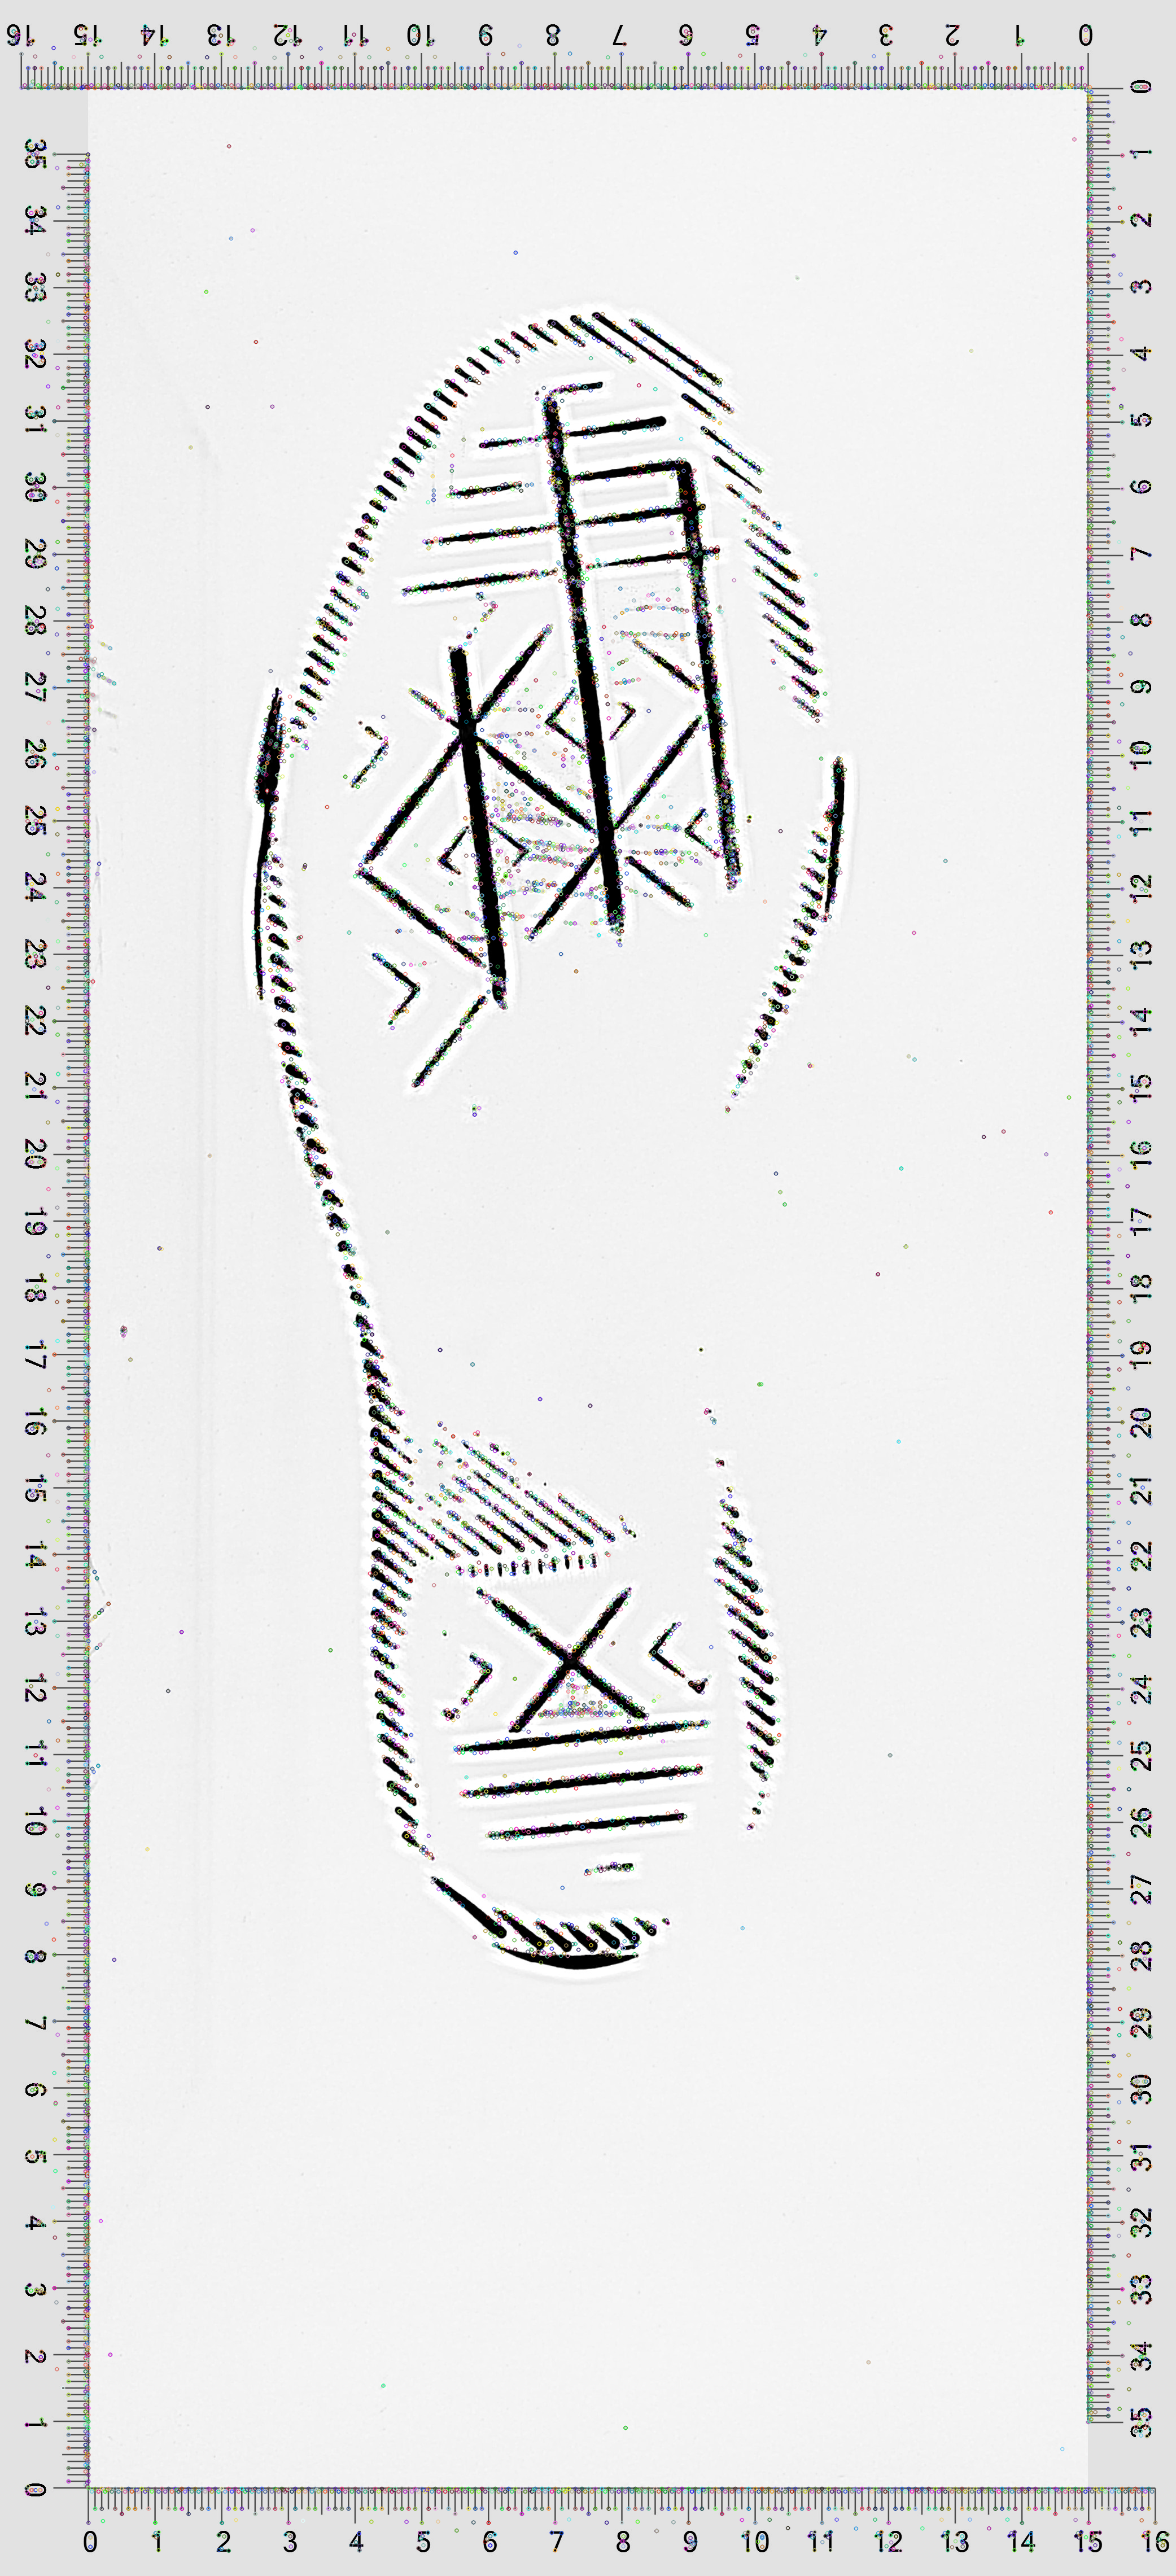

In [19]:
# import required libraries
import cv2
from google.colab.patches import cv2_imshow
# read input image
img = cv2.imread('001_01_L_01.jpg', cv2.IMREAD_GRAYSCALE)


# Initiang SIFT object with default values
sift = cv2.SIFT_create()

# find the keypoints on image (grayscale)
kp = sift.detect(img,None)


# draw keypoints in image
img = cv2.drawKeypoints(img,kp, None, flags=0)   


# display the image with keypoints drawn on it
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Look at that it detects any edge or contour of our image then lets get into how we can have two images and correlate the matches or keypoints between them in the next part!**

### TODO Implement this algorithm with your own set of features

In [ ]:
#TODO Implement your code here with a footprint image given by the image footprintset
# import cv2_imread() etc utilize the features

##Countour Challenge Algorithm

Countour detection is one of the forefronts for early image processing 

## Cross-correlation of two footprints(WIP) need more info

In order for us to cross-correlation images together we have to follow some steps

* Load our image footprints and extract there pixel by pixel data
* Normalizing our images and downsample the images
* Calculate cross corelation using our matrixed pixel information
* Then highlight our areas of image overlap



** downsample - compressing an image's resolution down.

In [ ]:
#import cv2

# Creating a kernel to iterate from in convultion process
##kernel = np.ones((5,5)np.float32)/25






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Chapter 3: Digital Image Steganography

In [ ]:
uploaded = files.upload()



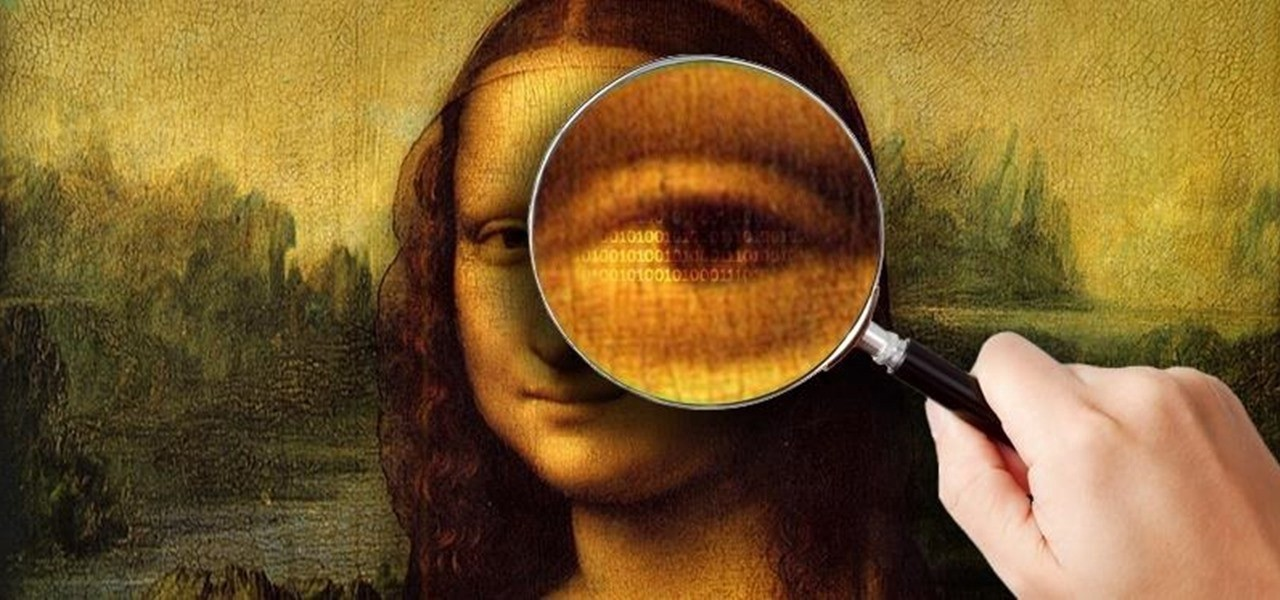

In [ ]:
Image('steganography mona lisa.jpeg', width = 1000 , height = 600)


In order to explore the the mind of a digital forensic scientist they often are tasked to explore anti forensic-techniques used by criminals and one that we will be exploring is Steganography.

Steganography is the process of hiding or concealing data like a "secret message per say" that can be hidden in either text, image or video.

Steganography is a vast field and there are plenty of ways to go about adding some sort of message onto a innocent looking image.

We will be exploring one Steganography method which is called **least significant bit steganography** a simple and easy to implement technique that will change the least significant bit of an image creating some small alteration of a embed image.

We will demonstrate this by an example of changing the bitmap index in one of our footprint images and giving you the run down analysis on how to decrypt an image of this sort as well.



https://www.nbcnews.com/id/wbna38028696



### Step 1 Accessing Indvidual Bits or Pixels in a image: 
We need to do some basic image manipulation one of the first and most simplest steps we can do for steganography is first finding the individual bits in a image. Any pixel we have in a numpy matrix is in the format of matrix[r,c] r being the row number and c being the columnn this needs to be fixed


TypeError: ignored

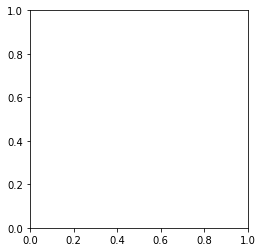

In [21]:
from matplotlib import pyplot as plt
sten_img = cv2.imread('001_001_L_01.jpg', 0)

plt.imshow(sten_img, cmap= 'gray')
print(sten_img)

# Chapter 4: Challenges( Video processing etc.))

Next step include something interactive like a quiz implementation with JavaScript.
One of the sample questions could be like what is the 5 step process in the canny algorithm etc